In [1]:
# pip install yfinance

1. **Close (Close Price)**:
   - This is the price at which a stock last traded at the end of a trading day.
   - It reflects the final market valuation of the stock for that day.




2. **Adj Close (Adjusted Close Price)**:
   - This is the closing price adjusted for factors like dividends, stock splits, and rights offerings.
   - Adjustments are necessary because these events can change the price of the stock and could distort historical price comparisons. For example, if a company undergoes a stock split, the number of shares increases, and the market price per share decreases. The adjusted close price reflects this change, allowing for more accurate long-term price comparisons.
   - Using the adjusted close price enables more accurate calculations of historical stock returns, as it provides a continuous record of prices that reflect all corporate capital changes.

## Beta

1. **Meaning of Beta Value**:
   - **Beta = 1**: The stock or portfolio's price movements are consistent with the market. If the market increases or decreases by 1%, the stock or portfolio also moves approximately 1%.
   - **Beta > 1**: The stock or portfolio is more volatile than the market. For example, a Beta of 1.5 means that for every 1% increase in the market, the stock or portfolio might rise by 1.5%; for every 1% decline, it might fall by 1.5%.
   - **Beta < 1**: The stock or portfolio's price movements are less than the market. For example, a Beta of 0.5 indicates that the stock or portfolio moves about half as much as the market does.
   - **Beta < 0**: The stock or portfolio moves inversely to the market. This is less common and typically seen in certain hedging strategies or special asset categories.

2. **Calculation of Beta Value**:
   Beta is typically calculated through statistical analysis by dividing the covariance of the stock returns with the market returns by the variance of the market returns.

3. **Applications of Beta Value**:
   - **Risk Management**: Investors use Beta to assess and manage the market risk of a portfolio.
   - **Capital Asset Pricing Model (CAPM)**: In the CAPM, Beta is used to calculate the expected return of an asset, helping investors decide whether an investment is attractive.
   - **Portfolio Construction**: By mixing assets with high and low Betas, investors can adjust the overall risk level of a portfolio according to their risk tolerance.


In [2]:
import yfinance as yf

ticker = 'AAPL'  # Example: Apple Inc.
start_date = '2024-05-01'
end_date = '2024-05-06'

# Fetch hourly market data
data = yf.download(ticker, start=start_date, end=end_date, interval='30m')# change interval to '1h' for hourly data

# Calculate hourly returns based on 'Open' prices
data['Hourly Returns'] = data['Open'].pct_change()

# Calculate the standard deviation of hourly returns
hourly_returns_std_dev = data['Hourly Returns'].std()

# Append standard deviation to the data DataFrame
data['Hourly Returns Std Dev'] = hourly_returns_std_dev

# Get stock information including beta
stock_info = yf.Ticker(ticker)
beta = stock_info.info.get('beta', 'N/A')  # Use get to avoid KeyError if beta is not available

# Append beta value to the DataFrame
data['Beta'] = beta

csv_filename = f'{ticker}_stock_prices_hourly_with_beta_and_returns_std_dev.csv'
data.to_csv(csv_filename)

print(f"Data saved to '{csv_filename}', including hourly returns, their standard deviation, and beta value.")

[*********************100%%**********************]  1 of 1 completed


Data saved to 'AAPL_stock_prices_hourly_with_beta_and_returns_std_dev.csv', including hourly returns, their standard deviation, and beta value.


In [3]:
import yfinance as yf
import numpy as np

# Set the stock ticker and date range
ticker = 'AAPL'  # For example, for Apple Inc.
start_date = '2023-01-01'
end_date = '2023-05-01'

# Get stock and other financial information
stock = yf.Ticker(ticker)
info = stock.info

# Fetch historical market data
data = stock.history(start=start_date, end=end_date)

# Calculate dividend yield
dividend_yield = info.get('dividendYield', np.nan) * 100  # Convert to percentage

# Fetch P/E Ratio
pe_ratio = info.get('trailingPE', np.nan)

# Calculate the daily returns
daily_returns = data['Close'].pct_change()

# Assume a risk-free rate (e.g., 1-year Treasury rate, here simplified as 1.5% annually)
risk_free_rate = 0.015
daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1  # Converting annual rate to daily

# Calculate excess returns
excess_returns = daily_returns - daily_risk_free_rate

# Calculate Sharpe Ratio (annualized)
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)

# Save results to CSV
results = {
    'Beta': info.get('beta', np.nan),
    'Dividend Yield (%)': dividend_yield,
    'P/E Ratio': pe_ratio,
    'Sharpe Ratio': sharpe_ratio
}

# Append these results to the data DataFrame
for key, value in results.items():
    data[key] = value

csv_filename = f'{ticker}_financial_metrics.csv'
data.to_csv(csv_filename)

print(f"Data and metrics saved to '{csv_filename}'")


Data and metrics saved to 'AAPL_financial_metrics.csv'


In [4]:
#pip install alpha_vantage

In [5]:
# from alpha_vantage.timeseries import TimeSeries
# import pandas as pd

# key = 'V5YICZQHLXV22U8R'  # instead of 'your
# ts = TimeSeries(key)
# data, meta_data = ts.get_daily(symbol='AAPL')

# df = pd.DataFrame(data)
# print(df.head())

## *Get stock price data from https://www.nasdaq.com/market-activity/stocks/screener*

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import yfinance as yf

df = pd.read_csv('stock_100.csv')

tickers = df['Symbol'].tolist()

results = pd.DataFrame()

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        beta = info.get('beta', 'N/A')  
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
        beta = 'N/A'  

    temp_df = pd.DataFrame({
        'Symbol': [ticker],
        'Beta': [beta]
    })
    results = pd.concat([results, temp_df], ignore_index=True)

print(results.head())

results.to_csv('beta_values.csv', index=False)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5ED&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EE&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EF&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&co

  Symbol   Beta
0      A  1.068
1     AA  2.458
2   AACG  1.022
3   AACI -0.018
4  AACIW -0.018


In [8]:
import pandas as pd
import yfinance as yf

df = pd.read_csv('stock_100.csv')

tickers = df['Symbol'].tolist()
industries = df['Industry'].tolist()

results = pd.DataFrame()

for ticker, industry in zip(tickers, industries):
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        beta = info.get('beta', 'N/A')
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
        beta = 'N/A'

    temp_df = pd.DataFrame({
        'Symbol': [ticker],
        'Industry': [industry],
        'Beta': [beta]
    })
    results = pd.concat([results, temp_df], ignore_index=True)

print(results.head())

results.to_csv('beta_values_with_industry.csv', index=False)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5ED?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5ED&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EE&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABR%5EF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABR%5EF&crumb=5.vJeEr2WZT
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACP%5EA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&co

  Symbol                 Industry   Beta
0      A      Electrical Products  1.068
1     AA                 Aluminum  2.458
2   AACG  Other Consumer Services  1.022
3   AACI             Blank Checks -0.018
4  AACIW             Blank Checks -0.018


In [9]:
pip install pandas fuzzywuzzy python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [10]:
# import pandas as pd
# from fuzzywuzzy import process

# stocks_df = pd.read_csv('beta_values_with_industry.csv')

# stocks_df['Industry'] = stocks_df['Industry'].astype(str).fillna('Unknown')

# standard_industries = [
#     "Advertising", "Aerospace/Defense", "Air Transport", "Apparel", "Auto & Truck",
#     "Auto Parts", "Bank (Money Center)", "Banks (Regional)", "Beverage (Alcoholic)",
#     "Beverage (Soft)", "Broadcasting", "Brokerage & Investment Banking",
#     "Building Materials", "Business & Consumer Services", "Cable TV",
#     "Chemical (Basic)", "Chemical (Diversified)", "Chemical (Specialty)",
#     "Coal & Related Energy", "Computer Services", "Computers/Peripherals",
#     "Construction Supplies", "Diversified", "Drugs (Biotechnology)",
#     "Drugs (Pharmaceutical)", "Education", "Electrical Equipment",
#     "Electronics (Consumer & Office)", "Electronics (General)",
#     "Engineering/Construction", "Entertainment", "Environmental & Waste Services",
#     "Farming/Agriculture", "Financial Svcs. (Non-bank & Insurance)",
#     "Food Processing", "Food Wholesalers", "Furn/Home Furnishings",
#     "Green & Renewable Energy", "Healthcare Products", "Healthcare Support Services",
#     "Healthcare Information and Technology", "Homebuilding",
#     "Hospitals/Healthcare Facilities", "Hotel/Gaming", "Household Products",
#     "Information Services", "Insurance (General)", "Insurance (Life)",
#     "Insurance (Property/Casualty)", "Investments & Asset Management",
#     "Machinery", "Metals & Mining", "Office Equipment & Services",
#     "Oil/Gas (Integrated)", "Oil/Gas (Production and Exploration)",
#     "Oil/Gas Distribution", "Oilfield Services/Equipment", "Packaging & Container",
#     "Paper/Forest Products", "Power", "Precious Metals", "Publishing & Newspapers",
#     "R.E.I.T.", "Real Estate (Development)", "Real Estate (General/Diversified)",
#     "Real Estate (Operations & Services)", "Recreation", "Reinsurance",
#     "Restaurant/Dining", "Retail (Automotive)", "Retail (Building Supply)",
#     "Retail (Distributors)", "Retail (General)", "Retail (Grocery and Food)",
#     "Retail (REITs)", "Retail (Special Lines)", "Rubber & Tires", "Semiconductor",
#     "Semiconductor Equipment", "Shipbuilding & Marine", "Shoe",
#     "Software (Entertainment)", "Software (Internet)", "Software (System & Application)",
#     "Steel", "Telecom (Wireless)", "Telecom Equipment", "Telecom Services",
#     "Tobacco", "Transportation", "Transportation (Railroads)", "Trucking",
#     "Utility (General)", "Utility (Water)", "Total Market (without financials)"
# ]

# def map_industry(industry):
#     if industry == 'Unknown':
#         return 'Other'
#     best_match, score = process.extractOne(industry, standard_industries)
#     return best_match if score >= 75 else 'Other'

# stocks_df['Mapped Industry'] = stocks_df['Industry'].apply(map_industry)

# print(stocks_df.head())

# stocks_df.to_csv('mapped_industry_beta_values.csv', index=False)


In [11]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

df = pd.read_excel('industry Beta.xlsx') 

df.to_csv('industry Beta.csv', index=False)


## Use BertModel to mapping

In [13]:
# import torch
# from transformers import BertModel, BertTokenizer
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')
# model.eval()

# df1 = pd.read_csv('stock_100.csv')
# df2 = pd.read_csv('industry Beta.csv')

# industries1 = df1['Industry'].tolist()
# industries2 = df2['Industry Name'].tolist()

# def get_bert_embedding(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.pooler_output[0].numpy()

# embeddings1 = [get_bert_embedding(industry) for industry in industries1]
# embeddings2 = [get_bert_embedding(industry) for industry in industries2]

# similarity_matrix = cosine_similarity(embeddings1, embeddings2)

# matched_indices = similarity_matrix.argmax(axis=1)
# matched_industries = [industries2[index] for index in matched_indices]

# df1['Matched Industry'] = matched_industries
# df1.to_csv('matched_industries.csv', index=False)

## Use TF- IDF to mapping

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df1 = pd.read_csv('beta_values_with_industry.csv')
df2 = pd.read_csv('industry Beta.csv')

df1['Industry'] = df1['Industry'].fillna('Unknown')
df2['Industry Name'] = df2['Industry Name'].fillna('Unknown')

industries1 = df1['Industry'].tolist()
industries2 = df2['Industry Name'].tolist()

vectorizer = TfidfVectorizer()

all_industries = industries1 + industries2
vectorizer.fit(all_industries)

tfidf1 = vectorizer.transform(industries1)
tfidf2 = vectorizer.transform(industries2)

similarity_matrix = cosine_similarity(tfidf1, tfidf2)

matched_indices = similarity_matrix.argmax(axis=1)
matched_industries = [industries2[index] for index in matched_indices]

df1['Matched Industry'] = matched_industries
df1.to_csv('matched_industries.csv', index=False)


## Use sentence-transformers

In [15]:
#pip install sentence-transformers

In [16]:
# from sentence_transformers import SentenceTransformer
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity

# model = SentenceTransformer('all-MiniLM-L6-v2')

# df1 = pd.read_csv('stock_100.csv')
# df2 = pd.read_csv('industry Beta.csv')

# df1['Industry'] = df1['Industry'].fillna('Unknown')
# df2['Industry Name'] = df2['Industry Name'].fillna('Unknown')

# embeddings1 = model.encode(df1['Industry'].tolist())
# embeddings2 = model.encode(df2['Industry Name'].tolist())

# similarity_matrix = cosine_similarity(embeddings1, embeddings2)

# matched_indices = similarity_matrix.argmax(axis=1)
# matched_industries = [df2['Industry Name'].iloc[index] for index in matched_indices]

# df1['Matched Industry'] = matched_industries
# df1.to_csv('matched_industries.csv', index=False)


In [17]:
pip install transformers torch requests

Note: you may need to restart the kernel to use updated packages.


## Predict the stock price

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data preprocessing
data = pd.read_csv('snp_beta_macd_signal_rsi_100.csv')


price_columns = data.filter(regex='^\d+/\d+/\d+ 0:00$').columns
prices = data.loc[0, price_columns].values.reshape(-1, 1)  #the first stock

# Normalize prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)




In [38]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 200  # previous 3 days
X, y = create_dataset(prices_scaled, look_back)



In [39]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)



Epoch 1/100


/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 - 1s - 40ms/step - loss: 0.0892
Epoch 2/100
26/26 - 1s - 22ms/step - loss: 0.0072
Epoch 3/100
26/26 - 1s - 22ms/step - loss: 0.0035
Epoch 4/100
26/26 - 0s - 10ms/step - loss: 0.0041
Epoch 5/100
26/26 - 0s - 12ms/step - loss: 0.0030
Epoch 6/100
26/26 - 0s - 10ms/step - loss: 0.0040
Epoch 7/100
26/26 - 0s - 11ms/step - loss: 0.0042
Epoch 8/100
26/26 - 0s - 12ms/step - loss: 0.0043
Epoch 9/100
26/26 - 0s - 12ms/step - loss: 0.0043
Epoch 10/100
26/26 - 0s - 10ms/step - loss: 0.0042
Epoch 11/100
26/26 - 0s - 13ms/step - loss: 0.0030
Epoch 12/100
26/26 - 0s - 11ms/step - loss: 0.0031
Epoch 13/100
26/26 - 0s - 11ms/step - loss: 0.0028
Epoch 14/100
26/26 - 0s - 11ms/step - loss: 0.0048
Epoch 15/100
26/26 - 0s - 10ms/step - loss: 0.0028
Epoch 16/100
26/26 - 0s - 10ms/step - loss: 0.0042
Epoch 17/100
26/26 - 0s - 11ms/step - loss: 0.0027
Epoch 18/100
26/26 - 0s - 11ms/step - loss: 0.0034
Epoch 19/100
26/26 - 0s - 11ms/step - loss: 0.0048
Epoch 20/100
26/26 - 0s - 11ms/step - loss: 0.0033
E

In [40]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse normalization to see actual predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


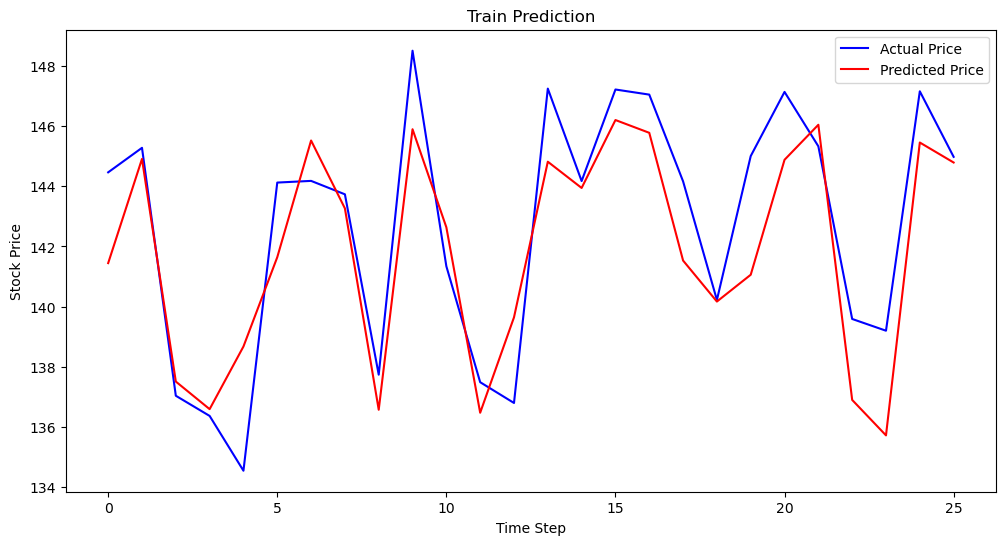

In [41]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv.flatten(), label='Actual Price', color='blue')
plt.plot(train_predict.flatten(), label='Predicted Price', color='red')
plt.title('Train Prediction')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



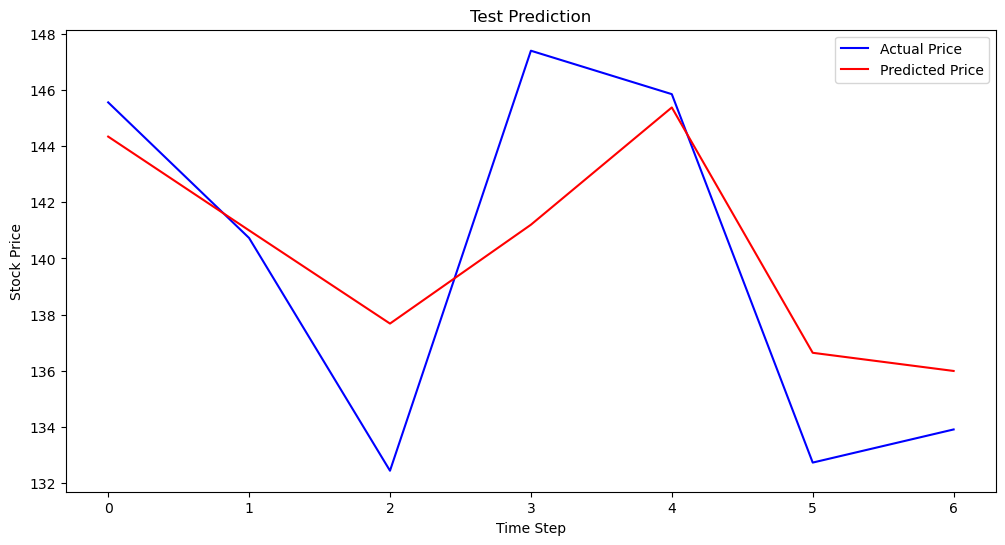

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv.flatten(), label='Actual Price', color='blue')
plt.plot(test_predict.flatten(), label='Predicted Price', color='red')
plt.title('Test Prediction')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()